##        Applications of Python Programming in Data Analysis
##                                 (Case Study: Airbnb - Listings)

##                                             Written by
##                                     ABAYOMI FASHINA
##                                    AMARACHI MBAKWE


##                                           COURSE INSTRUCTOR: 
##                     DR JOHN NICHOLSON (ASSOCIATE PROFESSOR)


#### INTRODUCTION

Data Science is an interesting field. It encompasses the art of uncovering the insights and trends that are hiding behind data [1]. It is a relevant field because we have tons of data around that need to be utilized for effective running of our organizations or businesses. Excellent decisions can be made if data is interpreted the right way.
Here, we will be using Python programming language. It has become a very popular programming language and is being used by different industries like Technology companies, Finance, Government, Schools and many others. We will be uncovering the insights and trends that are hiding behind Airbnb datasets using Python programming language in Jupyter notebook.


#### MOTIVATION
Every business desires expansion and increase in sales. We are interested in the factors that makes a business succeed. Being motivated by that we will be using Airbnb as a case study. Airbnb as a business with other competitors in the market will always seek for ways to improve bookings and increase sales in each country and states and to stand out among other competitors. We have been saddled with the responsibility to analyze the Airbnb data and come up with positive recommendations for the management. We want to extract this data from public.opendatasoft.com platform, analyze them and check for insights hiding behind the data.


#### DATA SET AND DATA COLLECTION:
We collected the dataset from Airbnb-Listing public.opendatasoft.com platform.  The dataset has 494,954 records. Attached is the link for the dataset: https://urlzs.com/LJQy


#### OBJECTIVES
We will be exploring the data by answering some questions and at the end build a model to predict the price of Airbnb listings.

#### Importation of Libraries
We imported all the libraries that are needed to execute our codes and be able to analyse our questions using the import command below.

In [35]:
%matplotlib inline
import matplotlib
import json
import os
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import io
import ijson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#### Reading the dataset
We used the 'with open' - 'as dataIn' and '.load' to read in the dataset into our Jupyter notebook. The dataset is a Json file.

In [2]:
with open('airbnb-listings.json') as dataIn:
    data = json.load(dataIn) # Load Json into data 

After downloading the csv file of the dataset, we had issues reading the dataset. Excel didnot help either and due to the fact that the dataset is very large, we couldn't visualize it in excel sheet to see why it is refusing to be read. Therefore, we went ahead and read the json file of the dataset. Which we were able to read.

#### Viewing the first index using the 0 as the first index

In [3]:
data[0]

{'datasetid': 'airbnb-listings',
 'recordid': '30cf435fd276c684bcabf5443a03f8dbac437634',
 'fields': {'review_scores_accuracy': 10,
  'reviews_per_month': 2.42,
  'bathrooms': 1.0,
  'features': 'Host Has Profile Pic,Host Identity Verified,Is Location Exact',
  'geolocation': [30.286343460389276, -97.81047757754384],
  'listing_url': 'https://www.airbnb.com/rooms/2501888',
  'transit': 'I can drive you to a bus stop or bike rental in the mornings. Don’t expect to be able to bike or walk to places from here. They city of West Lake Hills doesn’t have sidewalks and the roads are steep and narrow in this area.',
  'room_type': 'Private room',
  'accommodates': 2,
  'calendar_last_scraped': '2017-03-06',
  'neighbourhood_cleansed': '78746',
  'host_neighbourhood': 'Westlake Hills',
  'street': 'Buckeye Trail, West Lake Hills, TX 78746, United States',
  'review_scores_communication': 10,
  'longitude': '-97.81047757754384',
  'country_code': 'US',
  'review_scores_cleanliness': 9,
  'neighb

In order to see how the dataset looks like and the features inside it to ensure it is the correct file we read. Also, to ascertain that the file was read well, we output the first row.

#### Changing the Json file to a dataframe
The file is a very large file, therefore we choose the columns that we need inorder to carryout our exploration,model building and interpretation. 'good_columns' contains the variables or columns that we need and we changed it to a dataframe. We opened an empty dataframe named 'df' and looped through the file and appends it to an empty list named 'Ist' and finally put it into our dataframe named 'df'.

In [4]:
#changing it from Json to dataframe
good_columns = ['id', 'host_id', 'country', 'country_code', 'state', 'bathrooms', 'bedrooms', 'accommodates', 'room_type', 'price', 'features', 'geolocation', 'room_type', 'price', 'weekly_price', 'listing_url','transit',
                'accommodates', 'calendar_last_scraped', 'host_neighbourhood', 'neighbourhood', 'street',  
                'longitude','latitude','height','width', 'review_scores_cleanliness', 'availability_365', 'availability_90', 'availability_60', 
               'first_review', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'review_scores_communication', 'city', 'property_type', 'space', 'zipcode', 
               'host_response_rate', 'host_since', 'host_since', 'access', 'amenities', 'market', 'maximum_nights','minimum_nights', 'cancellation_policy', 
               'security_deposit', 'description', 'scrape_id', 'host_listings_count']

df = pd.DataFrame() # Create an empty DataFrame df
for item in good_columns: #Look through all the item in the good_columns
    lst = []
    for row in data:
        try:
            field = str(row['fields'][item])
            lst.append(field)
        except:
            lst.append(np.nan)
    df[item] = lst
    
df

,id,host_id,country,country_code,state,bathrooms,bedrooms,accommodates,room_type,price,...,access,amenities,market,maximum_nights,minimum_nights,cancellation_policy,security_deposit,description,scrape_id,host_listings_count
0,2501888,12806524,United States,US,TX,1.0,1,2,Private room,88,...,Guests will have access to main house with ful...,"Wireless Internet,Air conditioning,Kitchen,Fre...",Austin,1125,1,flexible,100,Sofa bed in the media room on the first floor....,20170306202425,2
1,377609,1897470,United States,US,TX,1.0,2,4,Entire home/apt,185,...,NaN,"TV,Cable TV,Internet,Air conditioning,Kitchen,...",Austin,1125,2,strict,750,"Located just 7 minutes to Downtown, and 4 minu...",20170306202425,1
2,15643010,59461475,United States,US,TX,1.0,1,2,Entire home/apt,60,...,The gym code is 235 and is located by the pool...,"Internet,Wireless Internet,Air conditioning,Ki...",Austin,7,1,moderate,NaN,"Close to the Barton Creek Greenbelt, S Lamar, ...",20170306202425,1
3,2236988,11421571,United States,US,TX,4.0,5,12,Entire home/apt,NaN,...,"Whole house, hot tub, grill, fire pit, green b...","TV,Cable TV,Internet,Wireless Internet,Air con...",Austin,14,3,strict,500,Magnificent Austin waterfront home on Barton C...,20170306202425,1
4,14788276,45591877,United States,US,TX,1.0,1,4,Entire home/apt,275,...,NaN,"TV,Wireless Internet,Air conditioning,Pool,Kit...",Austin,30,1,moderate,500,Find indulgence the moment you enter the bouti...,20170306202425,1
5,17097637,114741870,United States,US,TX,1.0,2,7,Entire home/apt,112,...,NaN,"TV,Wireless Internet,Air conditioning,Pool,Kit...",Austin,10,3,moderate,NaN,Wonderful 2 Bed / 1 Bath condo perfect for ent...,20170306202425,1
6,1700352,1657715,United States,US,TX,1.0,1,2,Private room,175,...,NaN,"Internet,Wireless Internet,Kitchen,Free parkin...",Austin,1125,3,strict,NaN,Private bedroom in a quiet neighborhood. The ...,20170306202425,1
7,15266450,38346884,United States,US,TX,2.0,2,6,Entire home/apt,400,...,NaN,"TV,Wireless Internet,Air conditioning,Pool,Kit...",Austin,1125,1,flexible,200,Flexible check-in/check-out dates for F1 Race!...,20170306202425,1
8,13182017,7020875,United States,US,TX,1.0,1,1,Private room,75,...,NaN,"Wireless Internet,Air conditioning,Kitchen,Fre...",Austin,45,3,flexible,200,"My place is close to UT Austin, downntown, Zil...",20170306202425,1
9,2466060,1870289,United States,US,TX,3.5,3,6,Entire home/apt,700,...,NaN,"TV,Cable TV,Internet,Wireless Internet,Air con...",Austin,1125,1,flexible,NaN,"Fabulous SXSW, 3 bedroom, 3 1/2 bath, 3 story ...",20170306202425,1


It might be difficult for us to work with json file directly based on our level of knowledge, therefore we changed it to dataframe so that we can easily work with it.

#### Printing out the headings of the columns in our dataframe

In [23]:
df.columns

Index(['id', 'host_id', 'country', 'country_code', 'state', 'bathrooms',
       'bedrooms', 'accommodates', 'room_type', 'price', 'features',
       'geolocation', 'weekly_price', 'listing_url', 'transit',
       'calendar_last_scraped', 'host_neighbourhood', 'neighbourhood',
       'street', 'longitude', 'latitude', 'height', 'width',
       'review_scores_cleanliness', 'availability_365', 'availability_90',
       'availability_60', 'first_review', 'number_of_reviews',
       'reviews_per_month', 'review_scores_rating',
       'review_scores_communication', 'city', 'property_type', 'space',
       'zipcode', 'host_response_rate', 'host_since', 'access', 'amenities',
       'market', 'maximum_nights', 'minimum_nights', 'cancellation_policy',
       'security_deposit', 'description', 'scrape_id', 'host_listings_count'],
      dtype='object')

We printed all the headings of our columns which is 48 in number. 

#### QUESTION 1
##### Which hosts are performing well ?
In answering this question, we picked the two columns that will help in answering the question and assigned it 'ct'. We discovered 100 is the highest scores rating and lock it with review_scores_rating. We would have loved to include number of bookings and income the host generates from listings but, they were not included in our dataset. We printed it.

In [4]:
ct = df[['host_id', 'review_scores_rating']]
ct 

,host_id,review_scores_rating
0,12806524,94
1,1897470,96
2,59461475,97
3,11421571,96
4,45591877,93
5,114741870,NaN
6,1657715,NaN
7,38346884,NaN
8,7020875,NaN
9,1870289,NaN


This is the table showing all the hosts that are performing well with 100% review score ratings, their host id and id. We locked the review scores rating and 100.

In [5]:
b = ct.loc[ct["review_scores_rating"] =="100"]
b

,host_id,review_scores_rating
12,946773,100
14,8874960,100
28,70804415,100
30,488117,100
35,14957011,100
44,28147227,100
47,3590196,100
52,1405013,100
61,80928415,100
68,34021380,100


##### Graphing the hosts with 100 percent rating according to their states.
We plotted a horizontal bar graph with the counts in red. We used value.counts().head(20) to plot the bar graph and using for loop to input the numbers on the bars. We plotted the top 20. The plt.figure sets our figure size to 10 by 6.

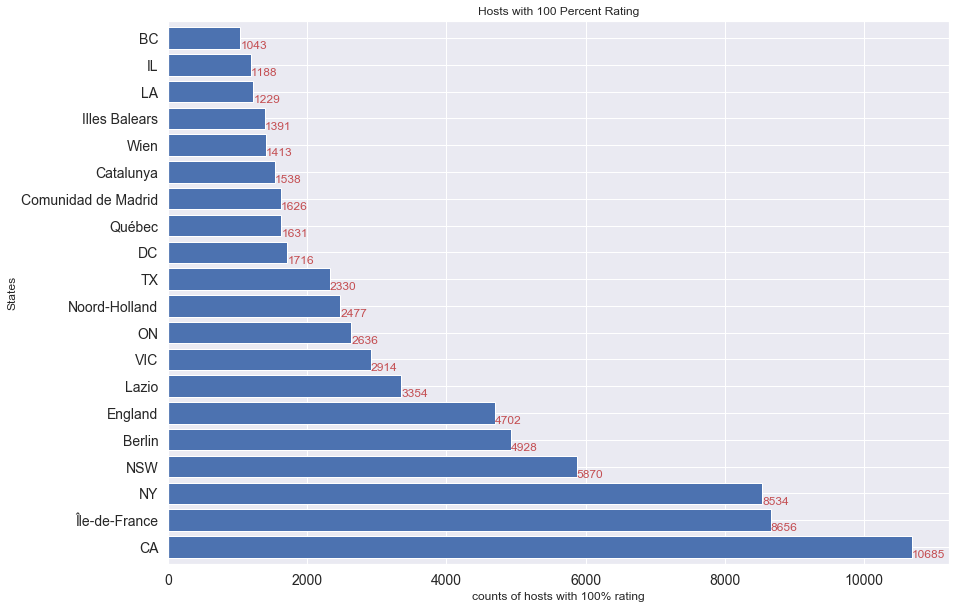

In [29]:
newdf = df.loc[df['review_scores_rating']=='100']
ax=newdf.state.value_counts().head(20).plot(kind='barh',figsize=(14,10), width=0.8, fontsize=14)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()), color='r', fontsize=12)
plt.title('Hosts with 100 Percent Rating')
plt.xlabel('counts of hosts with 100% rating')
plt.ylabel('States')
plt.show()

The graph contains numbers in red which represents the total  number of hosts in each of the states with 100% rating scores. This tells us that these hosts have good rating and are performing well.

### QUESTION 2
#### What is the minimum night stay?
We can see from the dataset that the minimum night stay is 1.In the code, we locked the minimum night eauals to 1 to see only those with minimum night equals to 1. The dataframe below contains the ones with minimum night stay equals to one. 

In [19]:
min_night = df.loc[df['minimum_nights']=='1']
min_night

,id,host_id,country,country_code,state,bathrooms,bedrooms,accommodates,room_type,price,...,access,amenities,market,maximum_nights,minimum_nights,cancellation_policy,security_deposit,description,scrape_id,host_listings_count
0,2501888,12806524,United States,US,TX,1.0,1,2,Private room,88,...,Guests will have access to main house with ful...,"Wireless Internet,Air conditioning,Kitchen,Fre...",Austin,1125,1,flexible,100,Sofa bed in the media room on the first floor....,20170306202425,2
2,15643010,59461475,United States,US,TX,1.0,1,2,Entire home/apt,60,...,The gym code is 235 and is located by the pool...,"Internet,Wireless Internet,Air conditioning,Ki...",Austin,7,1,moderate,NaN,"Close to the Barton Creek Greenbelt, S Lamar, ...",20170306202425,1
4,14788276,45591877,United States,US,TX,1.0,1,4,Entire home/apt,275,...,NaN,"TV,Wireless Internet,Air conditioning,Pool,Kit...",Austin,30,1,moderate,500,Find indulgence the moment you enter the bouti...,20170306202425,1
7,15266450,38346884,United States,US,TX,2.0,2,6,Entire home/apt,400,...,NaN,"TV,Wireless Internet,Air conditioning,Pool,Kit...",Austin,1125,1,flexible,200,Flexible check-in/check-out dates for F1 Race!...,20170306202425,1
9,2466060,1870289,United States,US,TX,3.5,3,6,Entire home/apt,700,...,NaN,"TV,Cable TV,Internet,Wireless Internet,Air con...",Austin,1125,1,flexible,NaN,"Fabulous SXSW, 3 bedroom, 3 1/2 bath, 3 story ...",20170306202425,1
11,14632346,37716788,United States,US,TX,1.0,0,3,Entire home/apt,49,...,Private entrance for guests using keypad lock....,"TV,Internet,Wireless Internet,Air conditioning...",Austin,1125,1,moderate,NaN,"Private, studio apartment-style casita, sharin...",20170306202425,1
12,15903071,946773,United States,US,TX,1.5,1,2,Private room,60,...,You are welcome in all parts of the house. We ...,"TV,Internet,Wireless Internet,Air conditioning...",Austin,15,1,moderate,200,Welcome to the Lake Travis area! You are going...,20170306202425,1
14,1677516,8874960,United States,US,TX,1.0,1,2,Private room,45,...,We have a small a cozy living room for sitting...,"TV,Internet,Wireless Internet,Air conditioning...",Austin,20,1,flexible,NaN,Get away from it all with a quiet stay in the ...,20170306202425,1
15,1278808,6959117,United States,US,TX,1.5,1,2,Private room,129,...,Guests have access to the entire property whic...,"TV,Wireless Internet,Air conditioning,Pool,Kit...",Austin,1125,1,flexible,NaN,"1 Queen room. Half acre lot with pool, garden,...",20170306202425,1
16,13606447,76433604,United States,US,TX,1.0,1,3,Private room,45,...,"Pool, gym, computer, TV,","TV,Internet,Wireless Internet,Air conditioning...",Austin,10,1,strict,NaN,supper comfortable queen size airmatt 22in off...,20170306202425,2


The ones with minimum night stay equals to 1 is 173699 in total.

### Graphically showing the minimum night stay based on the different room types

We have already imported the seaborn initially. So, we used sns.countplot() to plot our graph. Other codes in the code cell is used for labelling and title.

Text(0.5, 0, 'Room Types')

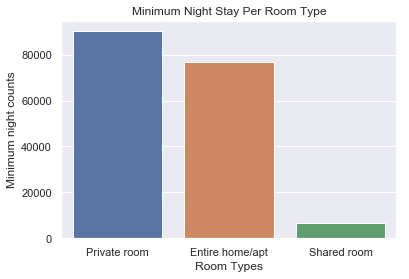

In [20]:
sns.countplot(min_night.room_type)
plt.title('Minimum Night Stay Per Room Type')
plt.ylabel('Minimum night counts')
plt.xlabel('Room Types')

Based on the bar plot above, we can see that majority of people that stay only one night in the Airbnb-listings normally go for private room. Some go for entire home/ apt room type. Only few people that rents shared room stay only one night.

#### Graphically showing the minimum night based on countries
 The plt.figure helps set the figure size to the value we desire. We used min_night.country.value_counts().head(20).plot.bar() to plot the bar graph and the other codes are for labelling.

Text(0.5, 0, 'Countries')

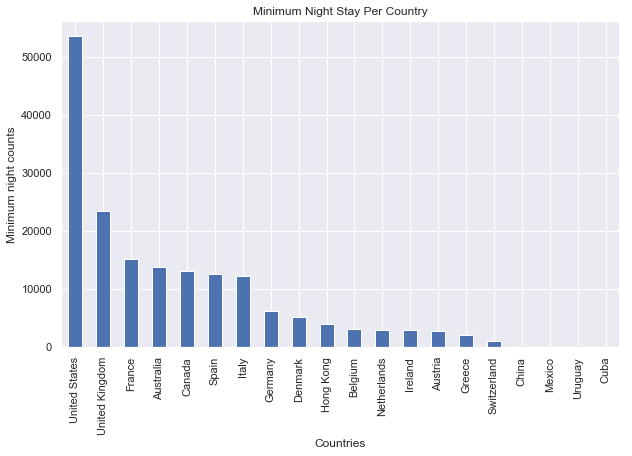

In [23]:
plt.figure(figsize=(10,6))
min_night.country.value_counts().head(20).plot.bar()
plt.title('Minimum Night Stay Per Country')
plt.ylabel('Minimum night counts')
plt.xlabel('Countries')

This is just a simple bar graph representing each of the countries and the total number of listings with minimum night stay equals to 1. This is a horizontal bar graph which we got by using 'barh'. The numbers on the bars are gotten by using for loop and'r' means red. The font size for the numbers is 12.

Text(0, 0.5, 'Countries')

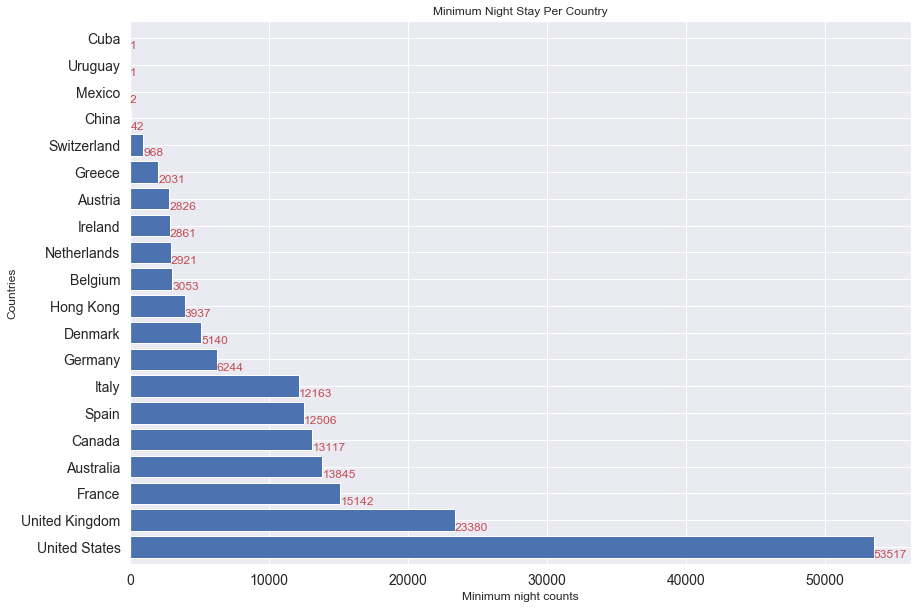

In [24]:
plt.figure(figsize=(10,6))
ax=min_night.country.value_counts().head(20).plot(kind='barh',figsize=(14,10), width=0.8, fontsize=14)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()), color='r', fontsize=12)
plt.title('Minimum Night Stay Per Country')
plt.xlabel('Minimum night counts')
plt.ylabel('Countries')

From the plot above, we can see that in United states substantial amount of people spend only one night in Airbnb-listing. Followed by United kingdom and France. Uruguay, Mexico and Vanuatu has the least number in terms of people that spends only one night. Also, in the code, we added a for loop that helps to input the total counts on the bars. The barh helps to make the bars horizontal.

#### Graph of minimum night stay equals to 1 according to State
We plotted a horizontal bar graph with the counts in blue. We used value.counts().head(20) to plot the bar graph and using for loop to input the numbers on the bars. We plotted the top 20.

Text(0, 0.5, 'State')

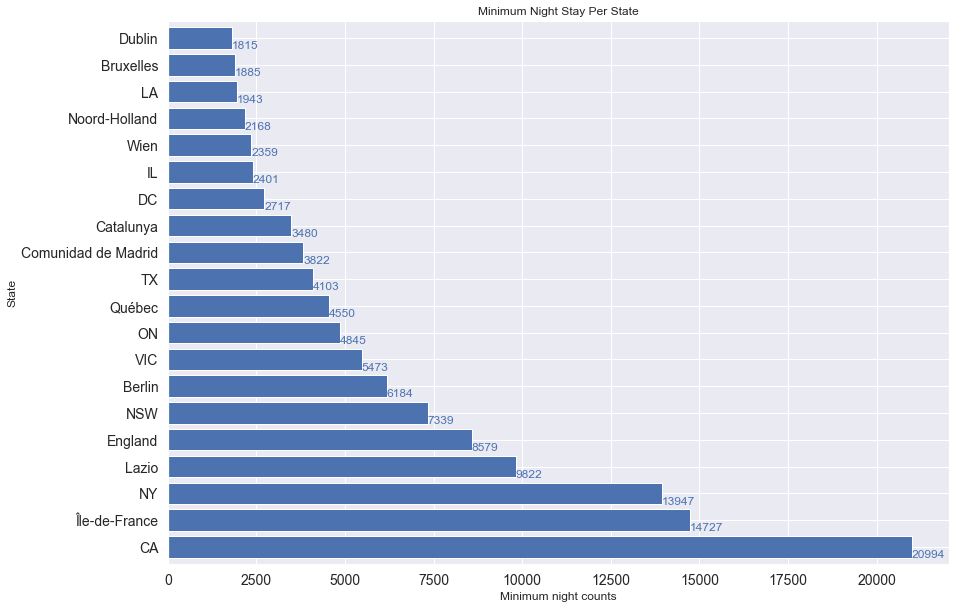

In [27]:
ax=min_night.state.value_counts().head(20).plot(kind='barh',figsize=(14,10), width=0.8, fontsize=14)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()), color='b', fontsize=12)
plt.title('Minimum Night Stay Per State')
plt.xlabel('Minimum night counts')
plt.ylabel('State')

California has the highest record of minimum night stay equals one which we are not so surprise because California is known as a state with lots of industries with their headquarters there. So, many people coming for a conference or otherwise can decide to spend just one night at Airbnb. It has a total count of 20,994. Ile-de-France following CA with total of 14727 of listings with minimum night stay equals to 1.

#### QUESTION 3
#### What is the number of occupants allowed in a rental?
In the code, we picked out the 'accommodates' column containing the number of people allowed to stay in each room type. We now plotted a graph using countplot.


Text(0, 0.5, 'Total counts')

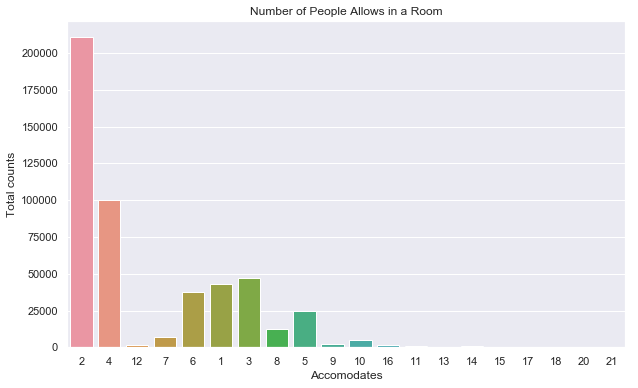

In [30]:
plt.figure(figsize=(10,6))
num_allowed = df['accommodates']
sns.countplot(num_allowed)
plt.title('Number of People Allows in a Room')
plt.xlabel('Accomodates')
plt.ylabel('Total counts')

The 'Accomodates' in the x-axis is the number of people that is allowed to stay in a room. 2 means that it is only 2 people that can stay in the room, 4 means it is four and so on. 1 bedroom accommodates just 2 people, 2 bedrooms accommodates just 4 people,5 bedrooms accommodates just 12 people and so on. From our plot, we can see that 1 bedroom which accomodates only two people has the highest occurence. Which shows that from our data, most of the listings has mainly 1 bedrooms.

#### QUESTION 4
#### What is the growth rate of Airbnb per country?
We will consider their growth rate based on the expansion rate of in each of the countries. That is , number of listings Airbnb has in each country. We assigned the country to growth and did a countplot using seaborn. We adjusted the labelling in the x-axis in order to accommodate all the countries using 'rotation =45'. 

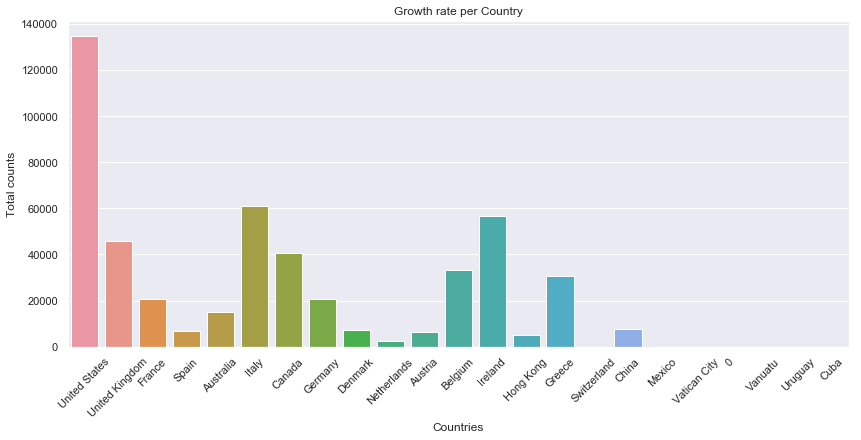

In [41]:
growth=df.country
growth.value_counts().index
#growth
plt.figure(figsize=(14,6))
ax = sns.countplot(growth)
ax.set_xticklabels(growth.value_counts().index, rotation = 45)
plt.title('Growth rate per Country')
plt.xlabel('Countries')
plt.ylabel('Total counts')
plt.show()

The plot indicates that Airbnb in the United states has the highest growth rate judging based on the number of locations that has Airbnb in United states.United states has the highest number of listings.It has different active branches which is one of the tools that indicate growtrh. 

####  Question 5
#### Which State is performing well in each country?

In the first code cell below, we cleaned the data by dropping the NAN values in the data.

In [38]:
statedata=df[['country','state']].dropna()

The data no longer contains NAN. In the next code cell, we used set to select the unique only the unique countries.

In [36]:
countries=set(statedata.country)
countries=[w for w in countries if w!='0']
countries

['Netherlands',
 'United States',
 'Ireland',
 'Denmark',
 'United Kingdom',
 'Italy',
 'Australia',
 'Spain',
 'Hong Kong',
 'France',
 'Cuba',
 'Belgium',
 'Germany',
 'China',
 'Canada',
 'Switzerland',
 'Vanuatu',
 'Uruguay',
 'Greece',
 'Vatican City',
 'Austria',
 'Mexico']

These are the unique countries represented that has Airbnb.

#### States in each country with the most listings 

We created empty lists hiState and count. We looped through the countries and appended both the index and values. We put them into dataframe with headings 'country, states and count' and assigned the dataframe 'statedf'. We sorted the dataframe by count in descending order using ascending=false. We excluded statedf.count=1 using !=1. Since, those with just 1 listing are not too important in our finding.

In [39]:
hiState = []
count = []
for c in countries:
        current=statedata.loc[statedata['country']==c,['state']]
        #print(current.head())
        currentdata=current.state.value_counts()
        hiState.append(currentdata.index[0])
        count.append(currentdata.values[0])
        #maximum=currentdata[0]
        #print(c,currentdata.index[0],currentdata.values[0])
statedf = pd.DataFrame({'Country': countries, 
              'States': hiState,
             'Count' : count})
statedf = statedf.sort_values(by = ['Count'], ascending = False)
statedf[statedf.Count != 1]

,Country,States,Count
9,France,Île-de-France,55095
1,United States,CA,49083
6,Australia,NSW,24725
5,Italy,Lazio,24706
4,United Kingdom,England,21922
12,Germany,Berlin,20469
14,Canada,ON,11628
7,Spain,Catalunya,10790
0,Netherlands,Noord-Holland,10711
20,Austria,Wien,6041


France has the most number of  listings and the state Ile-de-France in France has the most listings which shows they are performing well judging based on number of listing.

####  QUESTION 6
#### Summary Statistics of Listing price by Country
Here, we decided to remove all the NAN values in our columns with numerical values using dropna() command and assigned them to dat. We selected price out and changed it to integers. Finally we grouped it by country using (.groupby) and agg with specifications to the aggregates we want like mean, median, max, min,standard deviation. You can decide to add more.

In [24]:
dat=df[['bathrooms','bedrooms','accommodates','longitude', 'maximum_nights',
      'minimum_nights','security_deposit','availability_365','availability_90',
      'availability_60', 'number_of_reviews','latitude', 'review_scores_cleanliness',
       'review_scores_rating', 'price','country']].dropna()

ndf = dat[~dat['price'].isnull()]
ndf['price'] = ndf['price'].astype(int)

ndf['price'].groupby(ndf['country']).agg(['mean','median','max','min','std'])

,mean,median,max,min,std
country,,,,,
Australia,164.383252,140,999,17,109.815918
Austria,73.664360,64,900,10,51.504503
Belgium,78.421919,65,850,16,55.481857
Canada,122.264345,100,999,13,82.633466
China,324.666667,359,471,144,166.181628
Denmark,579.809436,577,996,99,198.509461
France,95.202633,80,999,8,63.461605
Germany,66.261057,55,550,0,45.428522
Greece,58.321816,45,525,9,48.915684


This shows the maximum, minimum, average and median price of Airbnb listings you can find in these countries.

####  QUESTION 7

#### Find the average and maximum host listing counts of hosts in United States.
In order to find the average and maximum host listing counts in unioted states, we loc country = united states to single out united states only. Also, we grouped the host_listings_count by state and aggregate(.agg) to find mean and max. Finally, we plotted the bar graph.



            mean   max
state                 
CA      6.405337  1114
CO      5.287141   535
Ca      2.500000     4
DC     20.943771   879
IL      9.989241   869
Il      2.000000     2
LA     17.639449  1026
MA     58.902371   749
MD      2.612903    12
MP      1.000000     1
NJ      3.000000     3
NY      2.220793   855
OR      3.319527   839
TN     17.817211   650
TX      8.625569   843
VT      1.000000     1
WA      7.159371   502
ca      4.200000    10
il      4.500000     7
ny      2.000000     6
wa      1.000000     1


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x432 with 0 Axes>

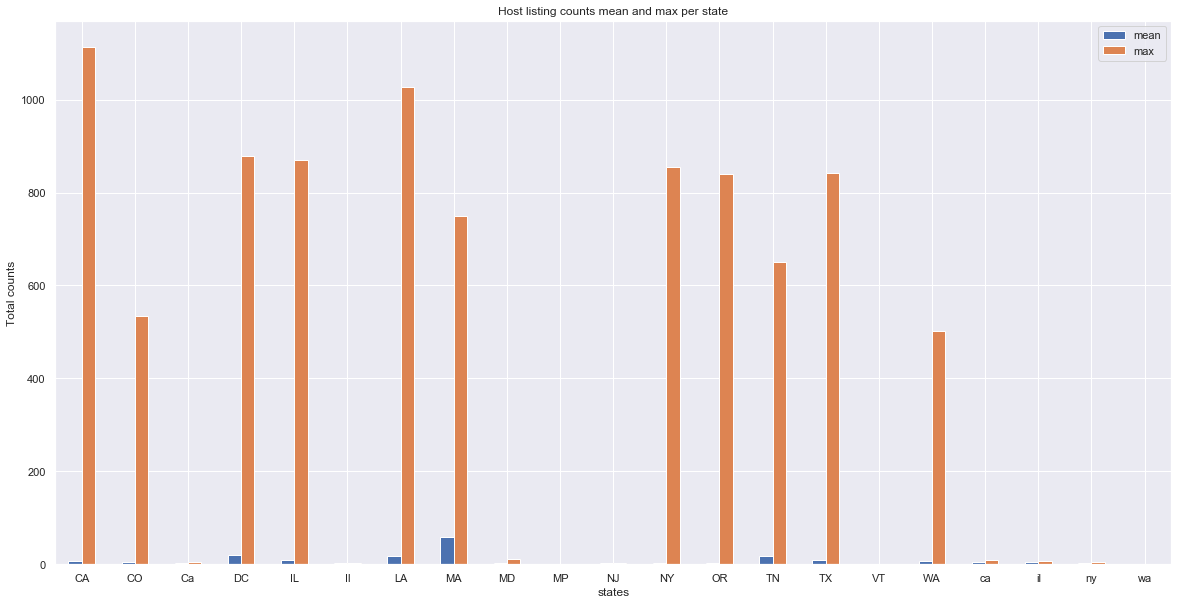

In [42]:
plt.figure(figsize=(10,6))
usdf = df.loc[df.country == 'United States']
usdf = usdf[~usdf['host_listings_count'].isnull()]
usdf['host_listings_count'] = usdf['host_listings_count'].astype(int)
dt = usdf['host_listings_count'].groupby(usdf['state']).agg(['mean', 'max'])
print(dt)
ax = dt.plot.bar(rot=0, figsize = (20,10))
plt.title('Host listing counts mean and max per state')
plt.xlabel('states')
plt.ylabel('Total counts')
plt.show

The orange bar represents the maximum host listing counts and blue bar represents the mean. California has many hosts with multiple listings, followed by Los Angeles.

#### QUESTION 8
#### How many listings are in my neighborhood and where are they?
The code cell below involves the value counts of listings in each neighbourhood using '.value_counts'.

In [25]:
df.neighbourhood.value_counts()

Williamsburg                           3305
Montmartre                             3205
Nørrebro                               2890
République                             2648
Buttes-Chaumont - Belleville           2549
Prati                                  2380
Neukölln                               2379
Bedford-Stuyvesant                     2289
Vesterbro                              2219
Oud-West                               2125
Central Business District              2116
Prenzlauer Berg                        2054
Batignolles                            1989
Kreuzberg                              1979
Mid-Wilshire                           1909
Bastille                               1898
Le Marais                              1893
Hollywood                              1856
Frederiksberg                          1800
XI Arrondissement                      1732
Le Plateau                             1710
Bushwick                               1697
Indre By                        

Williamsburg neighbourhood has the highest number of listings in its neighbourhood. The number besides each neighbourhood signifies the total number of listings in that neighbourhood.

#### QUESTION 9
#### Building models to predict the price of Airbnb listings using some of the features

We selected the columns we want to use to predict price and assigned them to s.

In [36]:
s= df[['bathrooms','bedrooms','accommodates','price','longitude', 'maximum_nights',
      'minimum_nights','security_deposit','availability_365','availability_90',
      'availability_60', 'number_of_reviews','latitude', 'review_scores_cleanliness',
       'review_scores_rating']]

We converted them to numeric and assigned them to the variable a. This will enable us build a model using the variables.

In [37]:
a=s.convert_objects(convert_numeric=True)

We used the a.info to to gain information about the columns we want to use. We can see it is now in float64.

In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 15 columns):
bathrooms                    493428 non-null float64
bedrooms                     494328 non-null float64
accommodates                 494891 non-null float64
price                        486996 non-null float64
longitude                    494953 non-null float64
maximum_nights               494952 non-null float64
minimum_nights               494952 non-null float64
security_deposit             204012 non-null float64
availability_365             494952 non-null float64
availability_90              494952 non-null float64
availability_60              494952 non-null float64
number_of_reviews            494952 non-null float64
latitude                     494953 non-null float64
review_scores_cleanliness    366479 non-null float64
review_scores_rating         367134 non-null float64
dtypes: float64(15)
memory usage: 56.6 MB


This is scatter plot for longitude against latitude. This will help us to visualize the dataset we want to build model with.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


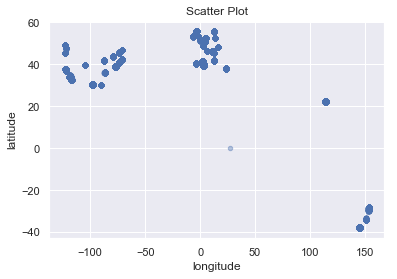

In [38]:
a.plot(kind="scatter", x= "longitude", y= "latitude", alpha=0.4)
plt.title('Scatter Plot')
plt.show()

Scatter plot of the data using price as determinant to see the area with the most expensive listing.

Text(0.5, 1.0, 'Scatter Plot of Distribution of Prices')

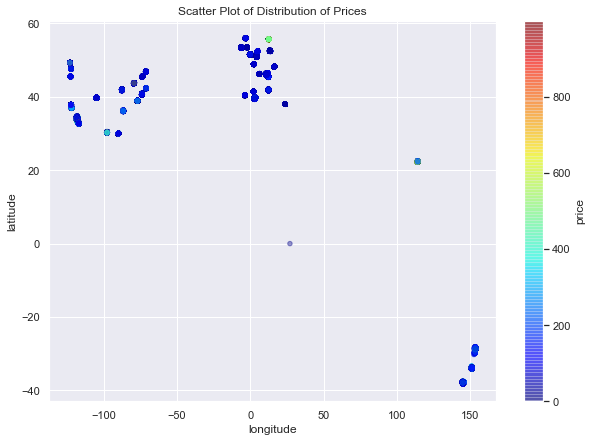

In [11]:
a.plot(kind = 'scatter', x ='longitude', y= 'latitude', alpha=0.4, figsize=(10,7),
      c='price', cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.title('Scatter Plot of Distribution of Prices')

We can see at the top, a point with color green happens to be the most expensive and it is probably in the North area.

The code below is used to plot the distribution(histogram) of the features using 'a.hist'. This helps us to understand the data we are working with in our model building.

<function matplotlib.pyplot.show(*args, **kw)>

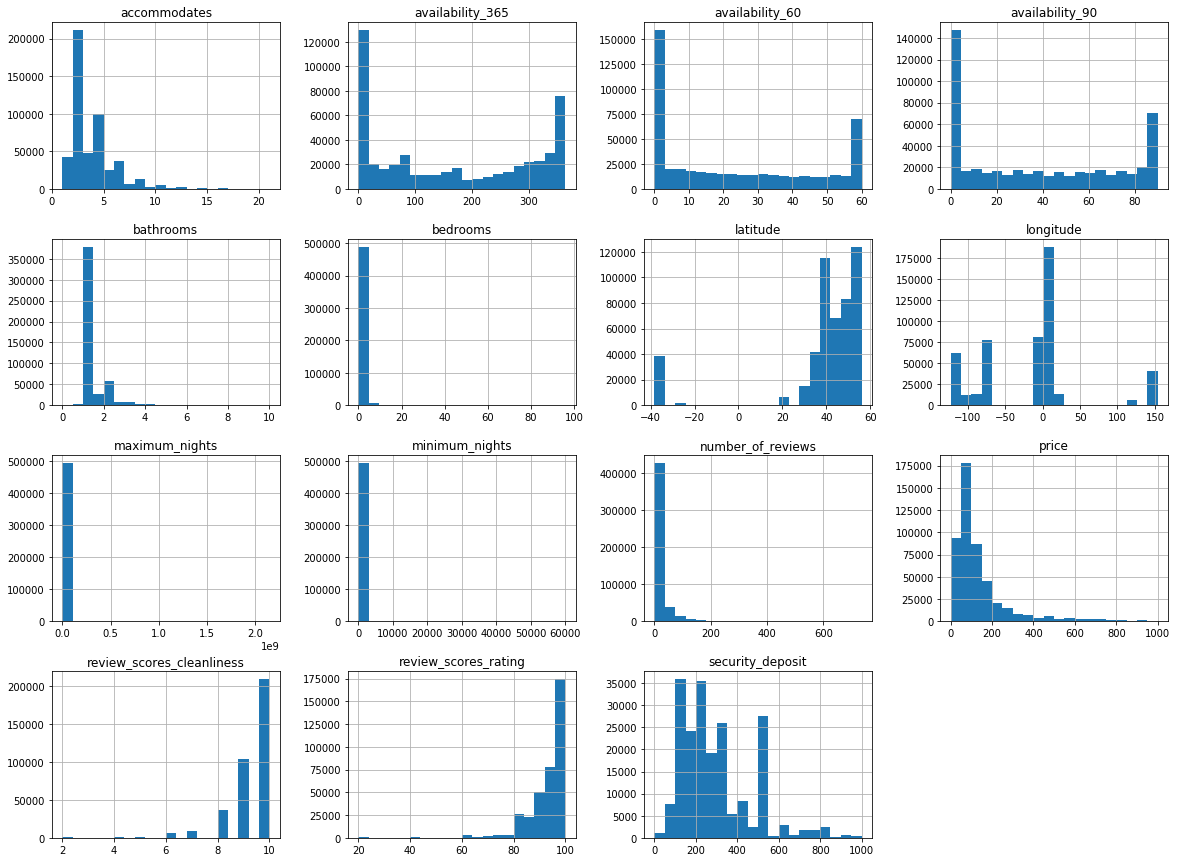

In [31]:
a.hist(bins=20, figsize=(20,15))
plt.show

The histogram is not normal. There are many that are skewed either to the right or left. But, this is not abnormal.

In [ ]:
We assigned the features to x and the response to y. Instead of dropping our NAN, we decided to fill it with the median.

In [14]:
x=a[['bathrooms','bedrooms','accommodates','longitude', 'maximum_nights',
      'minimum_nights','security_deposit','availability_365','availability_90',
      'availability_60', 'number_of_reviews','latitude', 'review_scores_cleanliness',
       'review_scores_rating']]
y= a['price']
features= x.fillna(x.median())
Y = y.fillna(y.median())

In the code below, we scaled the variables using minmaxscalar. It eill improve our variables and make them be on them be on the same scale which is useful for our model building.We also splitted the dataset into train and test data.

In [15]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(features, Y,test_size=0.2,random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Building Linear Regression
We have imported the libraries already. We built a linear regression model and fit it on the train data.

In [16]:
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The linear regression has a very low accuracy of 16%. This implies that only 16% of the variability in y can be explained using x which shows that linear regression model is not best for this situation. We tried lasso regression too, it also, had a low accuracy. We removed it. This shows linear regression might not be good for this.

In [17]:
y_pred = regressor.predict(X_test_scaled)
print('Linear Regression R squared : %.4f'% regressor.score(X_test_scaled,y_test))

Linear Regression R squared : 0.1593


##### Finding the Root mean squared error of the Linear regression
We have imported mean_squared_error from sklearn.metrics which we used to find the root mean squared error. The root mean squared error is 137.0992. This shows that our model was able to predict the price of the listing in our test set within $137.0992 of the real price.

In [18]:
# RMSE
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression Rmse : %.4f'% lin_rmse)

Linear Regression Rmse : 137.0992


We imported the RandomForest Regressor from sklearn.ensembele to build our random forest regression model. We built the model on our train set. We set our random state=42. Setting random state to a fixed value will guarantee that same sequence of random numbers are generated each time we run the code.

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_scaled,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

We looked for the Random forest Rsquared and got Rsquared = 0.6110. This is far better than the linear and lasso regression we did.
This implies that only 61% of the variability in y can be explained using x which shows that Random forest regression is better then linear regression model  for this situation. 

In [25]:
print('Random forest R squared : %.4f'% forest_reg.score(X_test_scaled,y_test))

Random forest R squared : 0.6110


#### Root mean squared error for the random forest regression model
We can see that the rmse for the random forest regression = 93.2596 is smaller than that of the linear regression model.

In [26]:
y_pred = forest_reg.predict(X_test_scaled)
forest_mse =mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest Rmse: %.4f'% forest_rmse)

Random Forest Rmse: 93.2596


##### Conclusion
For the model, we prefer the Random forest regression model over the linear regression model for this situation.

##### DISCUSSION
from the analysis we carried out on the dataset, we can see that some hosts are performing well more than others. Airbnb hosts need to look into this and see that most of these hosts that out performed others has quick response time and well organised listing management skills judging from their rows.The groth rate of Airbnb listings in United states is very high. I believe increasing their marketing strategy in other countries too will help them to expand more in other countries. California and Ile-de-France stood out as the states with the highest number of listings. There is need to expand in other states too. Also, countries need to extend their industrisation to every part of their countries. I noticed there are very few occurence of Airbnb in China, Mexico, Uruguay and Cuba, including that some countries were not included which is possible evidence that there is no Airbnb in those countries not mentioned. Some neighbourhood has many listings where as some has only one, Airbnb should consider those areas and see if there is need to expand more in those areas with just one like New Drop beach , Clifton etc.This is an interesting project, a better dataset with number of bookings and income generated per day, monthly or  yearly with other key factors will do a very good analysis.

#### RECOMMENDATION
Airbnb should consider expanding more in those areas that perhaps doesn't have Airbnb or just have very few like 1. Also, there should be more customer service trainings for their hosts to enable them perform better. A host should not be allowed to manage too many listings which can reduce his or her efficiency.

#### REFERENCES
 1. https://www.coursera.org/learn/what-is-datascience
 2. https://public.opendatasoft.com
 3. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython(2nd Edition). Wes McKinney.
